# Project : 
## Predict if Passegers  Survived the Titanic Disaster or not, why and what to do to ensure the chance of such happening is extremely slim in the future.

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Con">Conclusions</a></li>
<li><a href="#Rec">Recommendations</a></li>
<li><a href="lim">Limitations</a></li>
<li><a href="#Ref">References</a></li>
</ul>

## Full Name : Odelola Solomon Oluwatobiloba

<a id='intro'></a>
## Introduction
The disaster happened on 15th of april 1912 where so many passengers died and few survived the incident. In this project i will be predicting if passengers survived and using so many analytical patterns to achieve the predictions.

**Description of Each Variable**
- fare : Passengers tfare
- Pclass : Passengers class
- Embarked: Point of Embarkation (c= Cherbourg, Q= Queenstown, S=Southampton)
- Cabin: cabin
- Parch: Number of parents/children on board
- Ticket: Ticket Number
- Sibsp: Number of Siblings or Spouse on board

<a id='wrangling'></a>
## Data Wrangling

### Import Libraries

In [1]:
#import all necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#import the data

data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv' , 
                   names=['Passenger_id','Survived','Pclass','Name','Sex','Age','Sibsp','Parch',
                         'Ticket','Fare','Cabin', 'Embarked'] )

#save the data to csv
data.to_csv('data.csv')

In [2]:
#read in the saved data
titanic=pd.read_csv('data.csv')

## Assess The Data

In [3]:
#display the first three observations in the data
titanic.head()

,Unnamed: 0,Passenger_id,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
0,0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [4]:
titanic=titanic.drop(columns=['Unnamed: 0'], axis=1)

In [5]:
#display the last 5 observations in the data
titanic.tail()

,Passenger_id,Survived,Pclass,Name,Sex,Age,Sibsp,Parch,Ticket,Fare,Cabin,Embarked
887,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13,NaN,S
888,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30,B42,S
889,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
890,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30,C148,C
891,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NaN,Q


In [6]:
#display the programmatic information of the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Passenger_id  892 non-null    object
 1   Survived      892 non-null    object
 2   Pclass        892 non-null    object
 3   Name          892 non-null    object
 4   Sex           892 non-null    object
 5   Age           715 non-null    object
 6   Sibsp         892 non-null    object
 7   Parch         892 non-null    object
 8   Ticket        892 non-null    object
 9   Fare          892 non-null    object
 10  Cabin         205 non-null    object
 11  Embarked      890 non-null    object
dtypes: object(12)
memory usage: 83.8+ KB


In [7]:
#display only the data types of each variable in the data
titanic.dtypes

Passenger_id    object
Survived        object
Pclass          object
Name            object
Sex             object
Age             object
Sibsp           object
Parch           object
Ticket          object
Fare            object
Cabin           object
Embarked        object
dtype: object

> From the data types displayed above, comparing the values of each variable it is obvious that some varibles have wrong data types

In [8]:
#display the names of the varibles for proper view of description
titanic.columns

Index(['Passenger_id', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Sibsp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
#check for missing values
titanic.isnull().sum()

Passenger_id      0
Survived          0
Pclass            0
Name              0
Sex               0
Age             177
Sibsp             0
Parch             0
Ticket            0
Fare              0
Cabin           687
Embarked          2
dtype: int64

In [10]:
#check for duplicates values
titanic.duplicated().sum()

0

In [11]:
#dimension of data
titanic.shape

(892, 12)

In [12]:
#display the frequency of some varibles 
titanic['Pclass'].value_counts()

3         491
1         216
2         184
Pclass      1
Name: Pclass, dtype: int64

In [13]:
#display the frequency of some varibles 
titanic['Embarked'].value_counts()

S           644
C           168
Q            77
Embarked      1
Name: Embarked, dtype: int64

In [14]:
#display the frequency of some varibles 
titanic['Survived'].value_counts()

0           549
1           342
Survived      1
Name: Survived, dtype: int64

In [15]:
#display the frequency of some varibles 
titanic['Sibsp'].value_counts()

0        608
1        209
2         28
4         18
3         16
8          7
5          5
SibSp      1
Name: Sibsp, dtype: int64

In [16]:
#display the frequency of some varibles 
titanic['Parch'].value_counts()

0        678
1        118
2         80
5          5
3          5
4          4
Parch      1
6          1
Name: Parch, dtype: int64

In [17]:
#check the content of some variables to see if it would need some cleaning.
titanic['Name'].unique()

array(['Name', 'Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Car

In [18]:
titanic['Ticket'].unique()

array(['Ticket', 'A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803',
       '373450', '330877', '17463', '349909', '347742', '237736',
       'PP 9549', '113783', 'A/5. 2151', '347082', '350406', '248706',
       '382652', '244373', '345763', '2649', '239865', '248698', '330923',
       '113788', '347077', '2631', '19950', '330959', '349216',
       'PC 17601', 'PC 17569', '335677', 'C.A. 24579', 'PC 17604',
       '113789', '2677', 'A./5. 2152', '345764', '2651', '7546', '11668',
       '349253', 'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371',
       '14311', '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572',
       '2926', '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651',
       'CA 2144', '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 1488

In [19]:
titanic['Ticket'].head()

0              Ticket
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
Name: Ticket, dtype: object

### Isuues Noted During Data Assessment
**Data Quality Issues**
- Wrong data types
- Missing values
- Un descriptive varibles like Pclass, Sibsp,

### Data Cleaning

#### Clean
- Convert wrong data types accordingly

#### Code

In [20]:
titanic['Age']=pd.to_numeric(titanic['Age'], errors='coerce')

In [21]:
titanic['Fare']=pd.to_numeric(titanic['Fare'], errors='coerce')

In [22]:
titanic['Survived']=titanic['Survived'].astype('category')

In [23]:
titanic['Pclass']=titanic['Pclass'].astype('category')

In [24]:
titanic['Parch']=pd.to_numeric(titanic['Parch'], errors='coerce')
titanic['Sibsp']=pd.to_numeric(titanic['Sibsp'], errors='coerce')

#### Test

In [25]:
titanic.dtypes

Passenger_id      object
Survived        category
Pclass          category
Name              object
Sex               object
Age              float64
Sibsp            float64
Parch            float64
Ticket            object
Fare             float64
Cabin             object
Embarked          object
dtype: object

#### Clean
- Fill all the missing values properly

In [26]:
# get the median of the Age
median_age=titanic['Age'].median()

#fill the missing values in Age variable with median ages
titanic['Age'].fillna(median_age, inplace=True)

In [27]:
#get the mode of the cabin and embarked columns and fill the missing values with the mode

mode_embark= titanic['Embarked'].mode()
mode_cabin= titanic['Cabin'].mode()

titanic['Embarked'].fillna(mode_embark, inplace=True)
titanic['Cabin'].fillna(mode_cabin, inplace=True)

#### Test

In [28]:
titanic.isnull().sum()

Passenger_id      0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
Sibsp             1
Parch             1
Ticket            0
Fare              1
Cabin           686
Embarked          2
dtype: int64

In [29]:
#display all the unique values in the cabin variable to see ceratin patterns
titanic['Cabin'].unique()

array(['Cabin', 'C23 C25 C27', 'C85', nan, 'C123', 'E46', 'G6', 'C103',
       'D56', 'A6', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       '

In [30]:
#display the frequency of each value in Cabin 
titanic['Cabin'].value_counts()

C23 C25 C27    5
G6             4
B96 B98        4
F2             3
E101           3
              ..
C7             1
C54            1
E36            1
C106           1
C148           1
Name: Cabin, Length: 148, dtype: int64

In [31]:
#display the hierarchical frequency of values in the Embarked column
titanic['Embarked'].value_counts()

S           644
C           168
Q            77
Embarked      1
Name: Embarked, dtype: int64

In [32]:
#get the mode of the cabin and embarked columns and fill the missing values with the mode

mode_embark= titanic['Embarked'].mode()
mode_cabin= titanic['Cabin'].mode()

titanic['Embarked'].fillna('S', inplace=True)
titanic['Cabin'].fillna('C23 C25 C27', inplace=True)

#### Test

In [33]:
#display missing values
titanic.isnull().sum()

Passenger_id    0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Sibsp           1
Parch           1
Ticket          0
Fare            1
Cabin           0
Embarked        0
dtype: int64

In [34]:
#fill the missing value in Fare column with its median
titanic['Fare'].fillna(titanic['Fare'].median(), inplace=True)

In [35]:
titanic.isnull().sum()

Passenger_id    0
Survived        0
Pclass          0
Name            0
Sex             0
Age             0
Sibsp           1
Parch           1
Ticket          0
Fare            0
Cabin           0
Embarked        0
dtype: int64

#### Clean
- Rename Some variables

#### Code

In [36]:
#Rename all the non descriptive columns properly
titanic=titanic.rename(columns={'Pclass':'Passenger_class','Sibsp':'Siblings_Spouse',
                               'Parch':'Parents_Children','Ticket':'Ticket_Number',
                               'Fare':'Passenger_Fare'})

#### Test

In [37]:
#display the data again
titanic.head()

,Passenger_id,Survived,Passenger_class,Name,Sex,Age,Siblings_Spouse,Parents_Children,Ticket_Number,Passenger_Fare,Cabin,Embarked
0,PassengerId,Survived,Pclass,Name,Sex,28.0,NaN,NaN,Ticket,14.4542,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,C23 C25 C27,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,C23 C25 C27,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S


In [38]:
#get rid of the first row where the columns of the data are repeating themselves
titanic=titanic[titanic['Passenger_id'] != 'PassengerId']

In [39]:
titanic.head()

,Passenger_id,Survived,Passenger_class,Name,Sex,Age,Siblings_Spouse,Parents_Children,Ticket_Number,Passenger_Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,C23 C25 C27,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,C23 C25 C27,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
5,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,C23 C25 C27,S


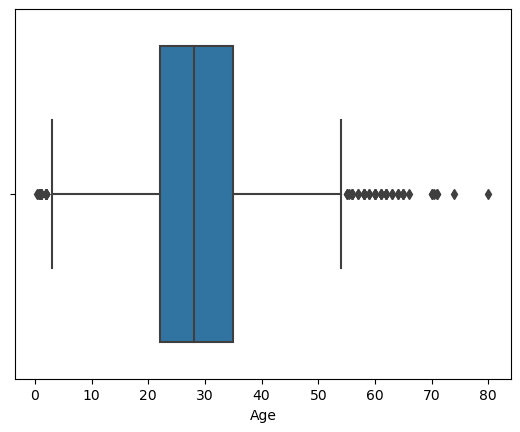

In [40]:
#create a box plot of the age of passengers to see if there are outliers
sns.boxplot(data=titanic, x='Age');

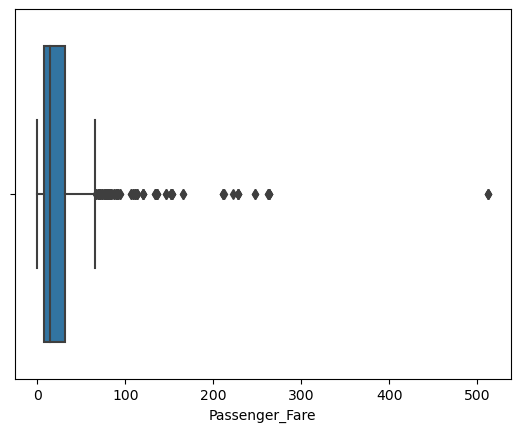

In [41]:
#create a box plot of the Fare of passengers to see if there are outliers
sns.boxplot(data=titanic, x='Passenger_Fare');

In [42]:
#save the cleaned data for data exploration purpose
titanic.to_csv('cleanedtitanic2.csv')

In [43]:
#read in the saved data
data=pd.read_csv('cleanedtitanic2.csv')

In [44]:
#drop the unwanted column
data=data.drop(columns=['Unnamed: 0'], axis=1)

In [45]:
#display the first 5 rows of the data
data.head()

,Passenger_id,Survived,Passenger_class,Name,Sex,Age,Siblings_Spouse,Parents_Children,Ticket_Number,Passenger_Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,C23 C25 C27,S


<a id='eda'></a>
## Exploratory Data Analysis

### Univariate Analysis

In [46]:
#run the summary statistics
data.describe()

,Passenger_id,Survived,Passenger_class,Age,Siblings_Spouse,Parents_Children,Passenger_Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the summary statistics of the numerical variables, it is obvious that 50% of the passengers are below 28 years of age, while 75% of all the passengers are below 35 years of age while the maximum age is 80. We can see that the difference between the 75% and maximum age of passengers is more than 50, hence there seems to be some outliers in the Age varible, that is there are fewer adults in the titanic disaster incident. From the standard deviation of the age of passengers being 13.019697, it shows that the variation of ages of passengers from the average age is moderately large

### Question1 (What is the Distribution of  Passengers Age?)

In [47]:
data['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

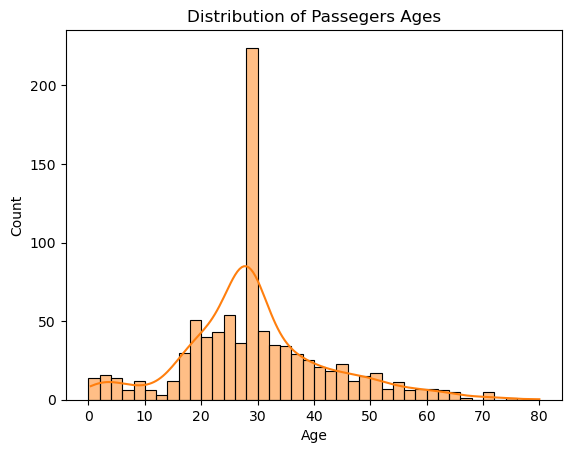

In [48]:
binsize=np.arange(0, data['Age'].max(), 2)

sns.histplot(data=data, x='Age', color=sns.color_palette()[1], kde=True, bins=binsize)
plt.title('Distribution of Passegers Ages');

> From the histogram plot of the distribution of Passengers age above , it is obvious that the data is skewed to the right. There are more passengers between the age of 20 and 46, while passengers who are 30 years of age are more than 200 but not 250 and have the highest frequency. Passenegers who are between the ages 60 years above are very small.Hence it is obvious that there are more young adults in the incident than aged people. 

### Question2 (What is the Distribution of Passengers Fare?)

In [49]:
data['Passenger_Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Passenger_Fare, dtype: float64

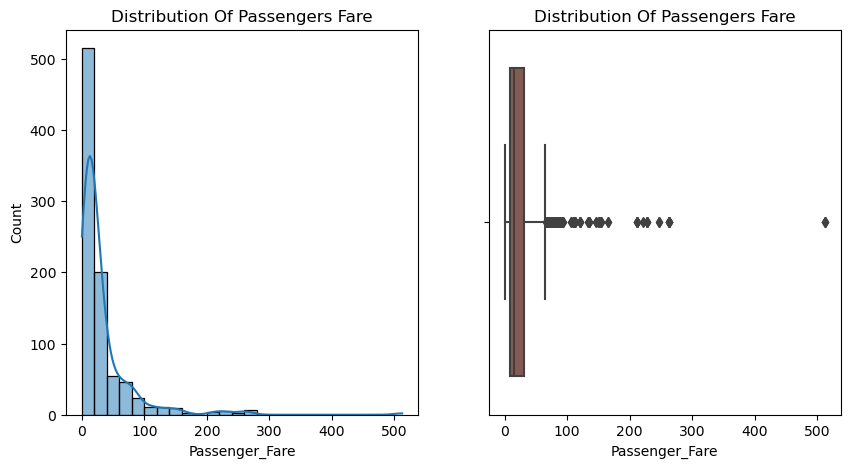

In [50]:
plt.figure(figsize=[10,5])

binsize=np.arange(0, data['Passenger_Fare'].max(), 20)
plt.subplot(1,2,1)
sns.histplot(data=data, x='Passenger_Fare', color=sns.color_palette()[0], kde=True, bins=binsize)
plt.title('Distribution Of Passengers Fare')

plt.subplot(1,2,2)
sns.boxplot(data=data, x='Passenger_Fare', color=sns.color_palette()[5])
plt.title('Distribution Of Passengers Fare');

> The essence of using an histogram plot and a box plot to show the distribution of passengers fare is for clarity sake. The historam plot of the is obviously righ skewed. It is clear enough that Passengers Fare of prices between 20 to 100 have the highest frequency, with Fare between 0 to 20 dollars having more than 500 passengers who paid that amount, exactly 200 passengers paid Fare of 20 to 40 dollars while passengers who paid Fare fromm 100 dollars above are very very minimal. I can infer from here that the Fare for the trip is not expensive and more than average passengers paid the amount but what needs to be further looked into is , in which particular class or cabin are those people who paid the smaller and larger fare?

### Question 3 (What is the Count of Passengers that survived and did not survive the titanic incident?)

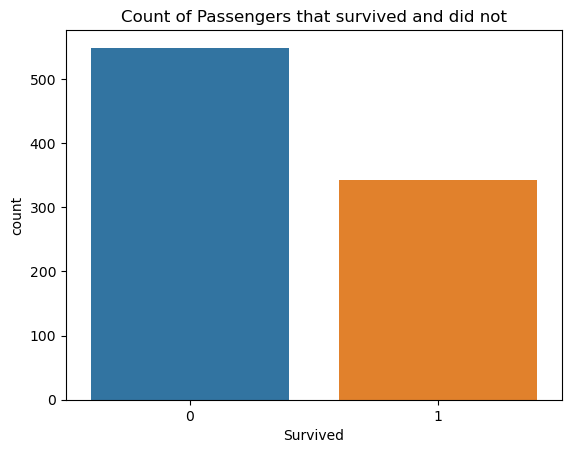

In [51]:
sns.countplot(data=data, x='Survived');
plt.title('Count of Passengers that survived and did not');

> The countplot above shows that more than 500 passengers died from the titanic disaster while less than 350 persons survived. This is really bad because more than average died. so i will be looking into different reasons why passengers died and why some did not die in some other analysis.

### Question 4 (Which  Class has the highest number of Passengers?)

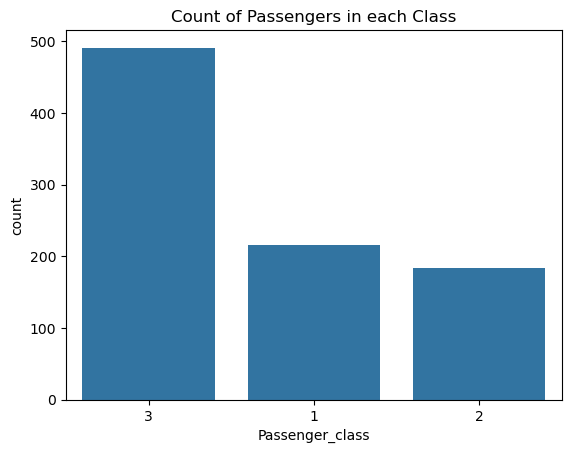

In [52]:
base_color=sns.color_palette()[0]
order_ind= data['Passenger_class'].value_counts().index
sns.countplot(data=data, x='Passenger_class', color=base_color, order=order_ind)
plt.title('Count of Passengers in each Class');

> From the countplot above, it is seen that there are a lot of passengers who paid for third class and second class had the least. recall that more than 500 passengers paid fare between 0 to 20 and from this count plot more than 490  passengers but not up to 500 was in the third class. Hence there is a high probability that the people in the third class are those who could not afford the high fare.

### Question 5 (What Gender has the highest number among the entire  population of passengers in the ship?)

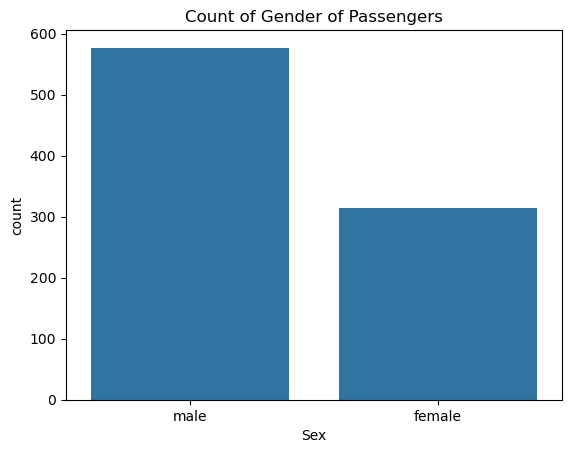

In [53]:
base_color=sns.color_palette()[0]
order_ind= data['Sex'].value_counts().index
sns.countplot(data=data, x='Sex', color=base_color, order=order_ind)
plt.title('Count of Gender of Passengers');

> There are more than 550 male passengers in the ship while there are about 300 female passengers in the ship. 

### Bivariate Analysis

### Question 6 ( What is the Effect of Age on the Survival of Passengers?)

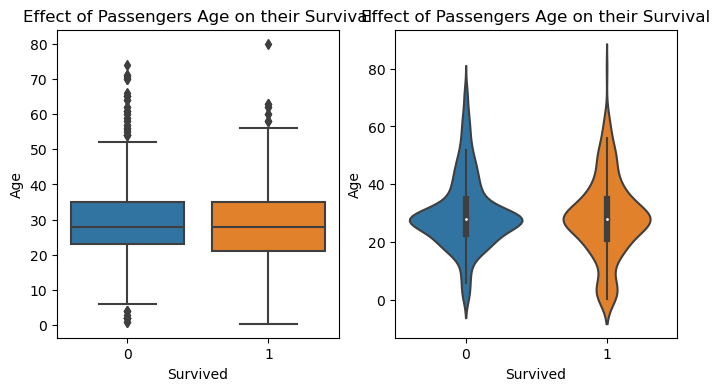

In [54]:
plt.figure(figsize=[8,4])

plt.subplot(1,2,1)
sns.boxplot(data=data, y='Age', x='Survived')
plt.title('Effect of Passengers Age on their Survival')

plt.subplot(1,2,2)

sns.violinplot(data=data, y='Age', x='Survived')
plt.title('Effect of Passengers Age on their Survival');

> From the Box and violin plot showing the distribution of the age group of passengers who survived and did not survive. It is seen that the box plot of those who survived is taller than those who di not survive, which indicates that the box plot of those who survived is more spread between about age range of 0 to 57, while the box plot of those who did not survive is spread between age range of about 7 to 53. From the Box plot of passengers who survived, it is seen that 50% of them is below the age about 29 , 75% is below the age of about 36 while the median or average age of those who did not survive is about 29.  For those who survived the incident, 50% of them are also below the age of 29 while 75% are below  the age of about 36 maximum age is about 57.

### Question 7 (What  Age group of Passengers has the highest number of Survival?)

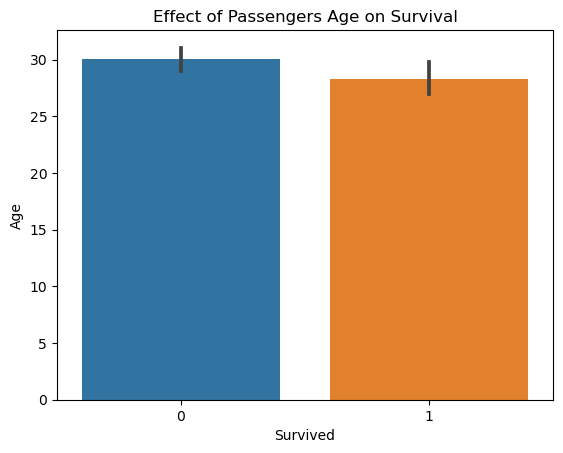

In [55]:
sns.barplot(data=data, y='Age', x='Survived')
plt.title('Effect of Passengers Age on Survival');

### Question 8 (What Fraction of Parents,Children,Spouse and Siblings Survived and did not Survive the Incident?)

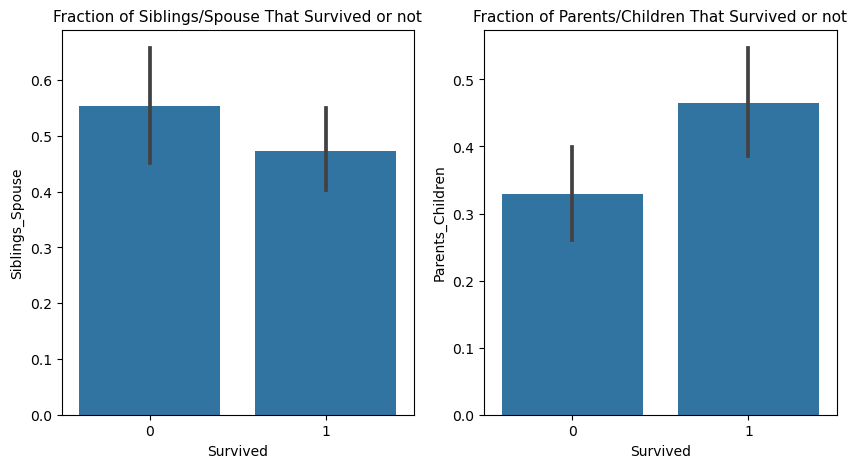

In [56]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.barplot(data=data, x='Survived', y='Siblings_Spouse', color=base_color)
plt.title('Fraction of Siblings/Spouse That Survived or not', fontsize=11)

plt.subplot(1,2,2)
sns.barplot(data=data, x='Survived', y='Parents_Children', color=base_color)
plt.title('Fraction of Parents/Children That Survived or not', fontsize=11
);

> From the countplot above showing the count/fraction of Siblings/Spouse that Survived or did not, it is obvious that more than  500 of the passengers who are Spouse/Siblings in the titanic disaster did not survive the incident, while less than 500 Siblings/Spouse were able to survive the titanic incident.  

> More than 400 Parents/children survived the incident while less than 350 parents/children did not survive the incident.

### Question 9 (Which of the Passengers Who survived or not paid the highest Average Fare for the Journey?)

In [57]:
data.groupby('Survived')['Passenger_Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Passenger_Fare, dtype: float64

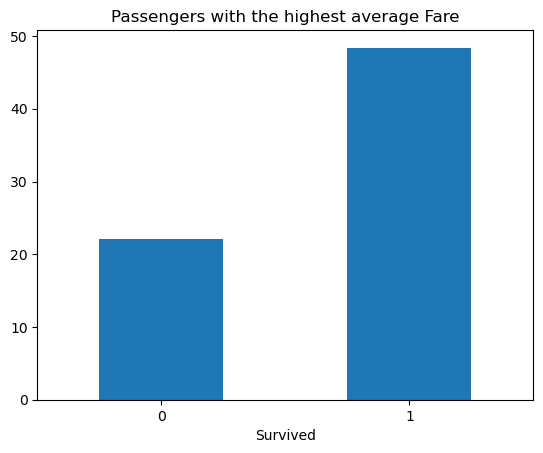

In [58]:
a=data.groupby('Survived')['Passenger_Fare'].mean()
a.plot(kind='bar')
plt.xticks(rotation=0);
plt.title('Passengers with the highest average Fare');

> A lot of passengers who survived the incident paid more than 450 dollars , which could possibly mean that they were in the first class in the ship and that could be why they had higher chance of survival than people in third class.  people who did not survive the incident paid fare of slightly above 20 dollars.

### Multivariate Analysis

### Question 11( What is the Relationship between each variable?)

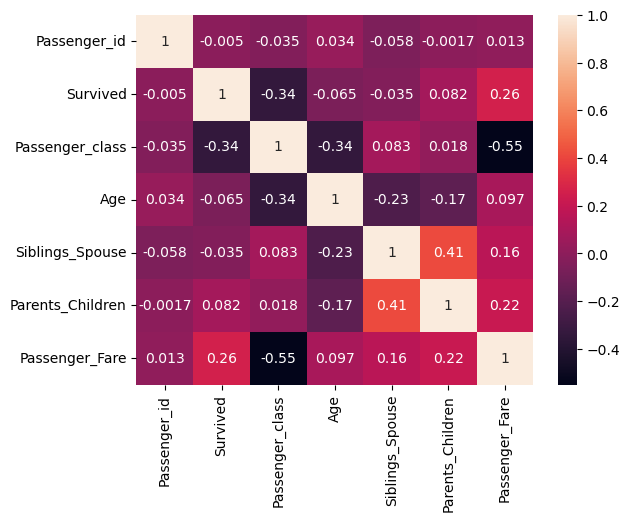

In [59]:
sns.heatmap(data=data.corr(), annot=True);

> From the heatmap showing the correlation between the variables in the data, the level of correlation between each feature is represented by the values. Although this project is more of a logistic regression model so since it is not a strictly linear relationship model, heatmap may not be so needed, yet, some variables  have a negative while some have positive but very weak relationship with the response variable(Survived).

### Question 12 (What is the Count of Siblings/Spouse Passengers that was able to survive in each Class?)

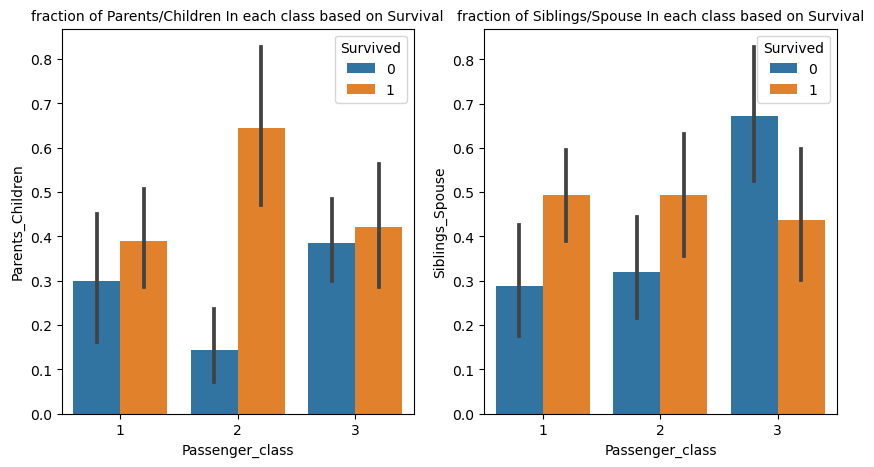

In [60]:
plt.figure(figsize=[10,5])

plt.subplot(1,2,1)
sns.barplot(data=data, x='Passenger_class', y='Parents_Children', hue='Survived')
plt.title('fraction of Parents/Children In each class based on Survival', fontsize=10)

plt.subplot(1,2,2)
sns.barplot(data=data, x='Passenger_class', y='Siblings_Spouse', hue='Survived')
plt.title('fraction of Siblings/Spouse In each class based on Survival', fontsize=10);

> More than 370 Parents/Children in the first class did not survive the titanic incident while approximately about 400 parents/children in the first class survived the incident.

> Parents/Children in the second class that did not survive the incident are not up to 150 while those who survived the incident are more than 600. 

> It is obvious that in the third class, more parents/children survived the incident than those who did not survive.

> From the chart to the right, it is seen that more than 270 spouse/siblings did not survive the incident while about 500 siblings/spouse survived the incident in the first class.

> In the second class, it is seen that more than 300 but less than 350 siblings/spouse did not survive the incident while about 500 siblings/spouse survived the titanic incident.

> For the Siblings/Spouse in the third class, more than 650 siblings/spouse did not survive the titanic incident while more than 400 but less than 500 siblings/spouse survived the titanic incident.

### Question 13 (What is the relationship between Passengers Age, Fare and Siblings/Spouse?)

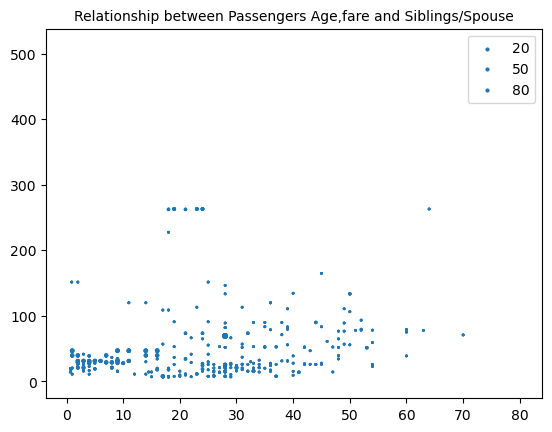

In [61]:
plt.scatter(data=data, x='Age', y='Passenger_Fare', s='Siblings_Spouse', color=base_color)

sizes=[20,50,80]
base_color= sns.color_palette()[0]
legend_obj=[]
for x in sizes:
    legend_obj.append((plt.scatter(data=data, x='Age', y='Passenger_Fare', s='Siblings_Spouse', 
                                   color=base_color)))
plt.legend(legend_obj, sizes)
plt.title('Relationship between Passengers Age,fare and Siblings/Spouse', fontsize=10);

### Question 14 (What is the Effect of Parents/Children and Passenger fare on the Survival rate of Parents and Children)?

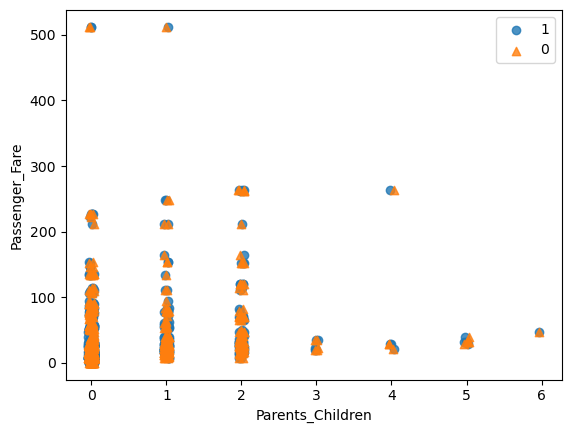

In [62]:
ttype_markers = [['1','o'],
         ['0','^']]

for ttype, cabs in ttype_markers:
    c_df=data[data['Survived']==ttype]
    sns.regplot(data=data, x='Parents_Children', y='Passenger_Fare', x_jitter=0.04, marker=cabs, fit_reg=False);
plt.xlabel('Parents_Children')
plt.ylabel('Passenger_Fare')
plt.legend(['1','0']);
    

### Question 15 ( What is the distribution and relationship between numerical  variables in the data 

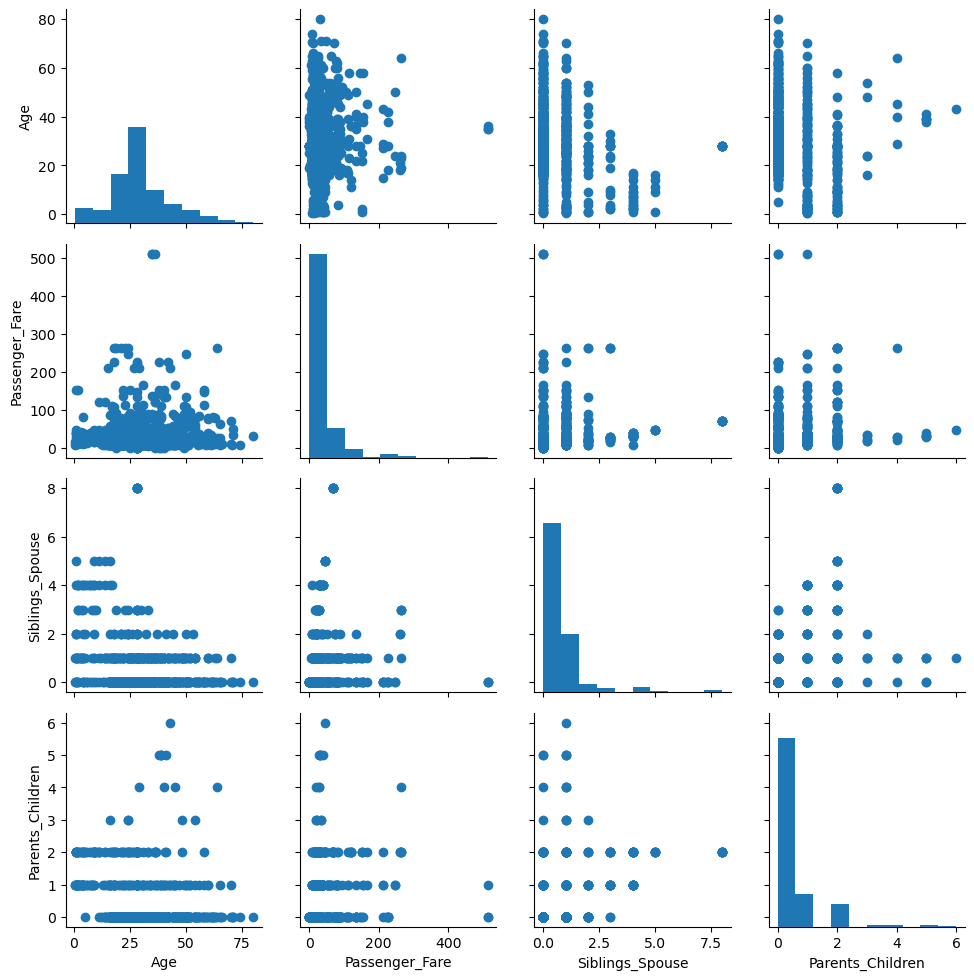

In [63]:
Embark_states=['Age','Passenger_Fare','Siblings_Spouse','Parents_Children']
g=sns.PairGrid(data=data, vars=Embark_states)
g=g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

> From the Multivariate charts showing the distribution of the numerical variables and the relation ship between each of tjem, it is obvious that the relationship between most of the varibles is not that of a positive linear relationship. The distribution of all the numerical varibles is right skewed.

<a id='Con' ></a>
## Conclusion

> From the whole analysis, i can possibly conclude that there are more males in the titanic disaster than there are females.  Also there are more passengers who were in the third class than the second class and from one other chart it was seen that those passengers paid nothing above 20 dollars compared to those in first class, which means that they cannot afford first class. It is also seen that Parents/Children who survived the titanic incident are majorly those in the second class while first class had the least number of survival, this could be probably because people in the first class were too relaxed due to comfort in the class or probably they were not as strong as those in 2nd and 3rd class because they have money and have had increament in size while made them find it hard to struggle but this is just a possibility. 

> The number of Spouse/Siblings that survived the incident most are those who also stayed in the 2nd and 1st class while 3rd class had the highest number of siblings/spouse who did not survive but least number of survival.

> It is also clear that there are more young adults in the incident than young and aged passengers, infact there are more passengers with the age of 20 to 50.
There are obvious more passengers who did not survive than those who did.
Ther are more passengers in the 3rd class than other classes.


<a id='Rec'></a>
## Recommendations

> Based on the entire analysis done, i can make inference on the entire population and here are my recommendations.  Allocation of classes to passengers in a ship should not just be based on thier money alone, their body size and strength should also be considered in case of necessity. It was very obvious that the age group that survived was of that of the people between 0 to 30 , so almost all the aged people died, hence aged people should probably be un allowed to travel via ship and if they have to be allowed they should be kept in a place where they will be able to escape easily since they must have had weak strength in their old age.  Seeing that people who survived the most are those who paid the least fare , i.e the poor , hence more attention should be given to creating an environment in the ship where people will not be so far from each other , i guess everyone should stay in a particular class so that they can help each othetr to escape in case of necessity.
lastly, passengers with too much family should not be allowed to travel via sheep because it was clear from my analysis that largest number of people who survived the incidents are young adults, it is possible their parents were trying to rescue the kids first before themselves.

<a id='lim'></a>
## Limitations

> I could have done more analysis if some varibles were actually present in this data set. varibales like 'body size of passengers', 'time of departure', 'ship attributes'

<a id='Ref'></a>
## References

- stackoverflow.com